# Основы машинного обучения (ИАД)
## НИУ ВШЭ, 2021-2022 учебный год

### Домашнее задание №8

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, mean_squared_error

# Бустинг

## Градиентный бустинг своими руками (3 + 2* баллов)

Реализуйте алгоритм градиентного бустинга для регрессии. Напомним **основные формулы**.

Обозначим текущую композицию на $N-1$ шаге за $a_{N - 1}(x_i)$. Следующий базовый алгоритм $b_N(x_i)$ обучается на ответах $-\frac{\partial L(y_i, z)}{\partial z}\Bigl|_{z = a_{N - 1}(x_i)}$, где $L(y_i, z)$ — значение функции потерь на объекте при правильном ответе $y_i$ и предсказании $z$. Композиция на следующем шаге получается следующим образом:

$$
a_N(x_i) = a_{N-1}(x_i) + \nu\gamma_Nb_N(x_i)
$$

Здесь $\nu$ — гиперпараметр learning rate, $\gamma_N$ — оптимальный вес, настраиваемый на каждом шаге алгоритма, который можно найти по следующей формуле (обратите внимание на отсутствие $\nu$):

$$
\gamma_N = \mathrm{arg}\min_\gamma \frac{1}{\ell}\sum\limits_{i=1}^{\ell}L\left(y_i, a_{N - 1}(x_i) + \gamma b_N(x_i)\right)
$$

Можете принять $\gamma_N = 1$ для каждого $N$.

> Реализуйте нахождение оптимального $\gamma_N$ на каждом шаге, чтобы получить ещё 1 балл.


В качестве функции потерь возьмите **MSE**.

*Примечание. Вы можете использовать `DecisionTree` из `sklearn` и методы оптимизации из различных библиотек.*

In [2]:
# это может помочь вам для поиска оптимальных gamma
from scipy.optimize import minimize

In [3]:
class GradientBoosting:
    def __init__(self, n_estimators, max_depth, learning_rate=0.1):
        """
        PARAMETERS:
        n_estimators - number of trees in the ensemble
        max_depth - maximum depth of a tree
        learning_rate - coefficient by which new algorithm result is multiplied
        """
        self.estimators = n_estimators
        self.depth = max_depth
        self.rate = learning_rate
        self.trees = [] # базовые деревья
        self.gammas = []
        
    def fit(self, x, y):
        """
        INPUT:
        x - np.array of shape (k, d)
        y - np.array of shape (k,)
        """
        # Здесь нам нужно проитерироваться по n_estimators и обучить
        # соответствующее количество деревьев с помощью _fit_predict_tree(),
        # правильно обновляя y_new
        # Деревья нужно где-то сохранить, чтобы затем использовать в predict()
        a = 0
        for i in range(self.estimators):
            y_new = y - a
            tree = DecisionTreeRegressor(max_depth = self.depth)
            tree.fit(x, y)
            self.trees.append(tree)
            pred = tree.predict(x)
            gamma = float(minimize(fun = lambda gamma: mean_squared_error(y, a + gamma * pred), x0 = 1).x)
            self.gammas.append(gamma)
            a += gamma * self.rate * pred
        
    def predict(self, x):
        """
        INPUT:
        x - np.array of shape (m, d)
        OUTPUT:
        y_pred - np.array of shape (m,)
        """
        # Используем сохранённые деревья для расчёта агрегированного предикшна
        y_pred = 0
        for i in range(len(self.trees)):
            y_pred += self.gammas[i] * self.rate * self.trees[i].predict(x)
        return y_pred

Проверьте вашу реализацию на Boston dataset. 

> Подберите оптимальные гиперпараметры, чтобы победить RandomForestRegressor как в обычном случае, так и при нахождении оптимального шага **(не меняйте параметры сида)**. При необходимости воспользуйтесь GridSearch. За это вы получите ещё 1 балл.



In [4]:
boston = load_boston()
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

In [5]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=4, n_estimators=640, random_state=19052019)

rf.fit(X_train, y_train)
mean_squared_error(y_test, rf.predict(X_test))

9.63198271791959

In [6]:
np.random.seed(19052019)

gb = GradientBoosting(n_estimators=20, max_depth = 8, learning_rate = 1)

gb.fit(X_train, y_train)
mean_squared_error(y_test, gb.predict(X_test))

26.478315695187245

In [7]:
mean_squared_error(y_train, gb.predict(X_train))

1.8236471935558325

In [8]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [9]:
from sklearn.model_selection import GridSearchCV
np.random.seed(19052019)

param_test = {
    'n_estimators':range(5,100,5),
    'max_depth':range(2,7,2),
    'learning_rate':np.linspace(0,1,4)
}

gb = GradientBoosting(n_estimators = 20, max_depth = 3, learning_rate = 1)

gsearch = GridSearchCV(estimator=gb, 
                        param_grid=param_test,
                        scoring='neg_mean_squared_error',
                        n_jobs=-1,
                        cv=5)

gsearch.fit(X_train,y_train)
gsearch.best_params_, gsearch.best_score_

TypeError: Cannot clone object '<__main__.GradientBoosting object at 0x0000021E82D59AC0>' (type <class '__main__.GradientBoosting'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [10]:
# чего-то не работает, сделаем по-другому...

In [11]:
errors = []
best = 100
np.random.seed(19052019)

for n in range(5,100,5):
    for depth in range(2,7,2):
        for rate in np.linspace(0,1,4):
            gb = GradientBoosting(n_estimators = n, max_depth = depth, learning_rate = rate)
            gb.fit(X_train,y_train)
            error = mean_squared_error(y_test, gb.predict(X_test))
            errors.append(error)
            if error < best:
                best = error
                best_param = [n, depth, rate]
best_param

[70, 6, 0.6666666666666666]

In [12]:
min(errors)

12.910009447500872

In [13]:
np.random.seed(19052019)

gb = GradientBoosting(n_estimators=70, max_depth = 6, learning_rate = 2/3)

gb.fit(X_train, y_train)
mean_squared_error(y_test, gb.predict(X_test))

14.941735733927057

In [14]:
errors = []
best = 100
np.random.seed(19052019)

for n in range(60,80,2):
    for depth in range(4,10,2):
        for rate in np.linspace(0,1,8):
            gb = GradientBoosting(n_estimators = n, max_depth = depth, learning_rate = rate)
            gb.fit(X_train,y_train)
            error = mean_squared_error(y_test, gb.predict(X_test))
            errors.append(error)
            if error < best:
                best = error
                best_param = [n, depth, rate]
best_param

[72, 8, 1.0]

In [15]:
min(errors)

11.356629130853106

In [16]:
np.random.seed(19052019)

gb = GradientBoosting(n_estimators=72, max_depth = 8, learning_rate = 1)

gb.fit(X_train, y_train)
mean_squared_error(y_test, gb.predict(X_test))

26.47831569789602

In [17]:
# лучше не стало

Для удобства проверяющего укажите, пожалуйста, реализовали ли вы нахождение оптимального шага?

- ДА

## Прогнозируем задержки самолётов (2 балла)

Поработаем с задачей про задержки самолётов. На основании доступных данных о рейсе вам нужно определить, будет ли он задержан на 15 минут.
Воспользуйтесь любыми методами градиентного бустинга {`XGboost`, `catboost`, `LightGBM`} и `GridSearchCV` для достижения результата.

> Получите 1 балл за преодоление порога roc_auc_score 0.72 и ещё 1 балл за преодоление порога 0.74.



In [219]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_test.csv')

In [19]:
train

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199,N
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884,N
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076,N
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140,N


In [220]:
test

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-7,c-25,c-3,615,YV,MRY,PHX,598
1,c-4,c-17,c-2,739,WN,LAS,HOU,1235
2,c-12,c-2,c-7,651,MQ,GSP,ORD,577
3,c-3,c-25,c-7,1614,WN,BWI,MHT,377
4,c-6,c-6,c-3,1505,UA,ORD,STL,258
...,...,...,...,...,...,...,...,...
99995,c-6,c-5,c-2,852,WN,CRP,HOU,187
99996,c-11,c-24,c-6,1446,UA,ORD,LAS,1515
99997,c-1,c-30,c-2,1509,OO,ORD,SGF,438
99998,c-1,c-5,c-5,804,DL,LGA,ATL,761


In [221]:
# Референс
from xgboost.sklearn import XGBClassifier

X_train = train[['Distance', 'DepTime']].values
y_train = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
X_test = test[['Distance', 'DepTime']].values
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size=0.3)

xgb = XGBClassifier()
xgb.fit(X_train_part, y_train_part)
roc_auc_score(y_valid, xgb.predict_proba(X_valid)[:, 1])

0.6934847985536556

In [222]:
model_xgb = XGBClassifier(learning_rate=0.1,
                          n_estimators=150,
                          objective= 'binary:logistic', 
                          nthread=-1, 
                          scale_pos_weight=1, 
                          seed=27)

In [223]:
y = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
y = np.array(y)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [224]:
X = train.drop('dep_delayed_15min', axis = 1)
X

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732
1,c-4,c-20,c-3,1548,US,PIT,MCO,834
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423
...,...,...,...,...,...,...,...,...
99995,c-5,c-4,c-3,1618,OO,SFO,RDD,199
99996,c-1,c-18,c-3,804,CO,EWR,DAB,884
99997,c-1,c-24,c-2,1901,NW,DTW,IAH,1076
99998,c-4,c-27,c-4,1515,MQ,DFW,GGG,140


In [225]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.columns:
    X[i] = le.fit_transform(X[i])
X

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,10,13,6,1017,0,18,78,577
1,6,12,2,791,18,217,171,651
2,11,11,4,705,20,228,59,306
3,2,17,5,458,15,78,175,683
4,1,28,5,951,19,174,199,313
...,...,...,...,...,...,...,...,...
99995,7,25,2,821,15,246,224,106
99996,0,9,2,327,4,92,72,691
99997,0,16,1,984,13,85,131,828
99998,6,19,3,758,12,79,107,55


In [226]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [227]:
from sklearn.model_selection import GridSearchCV

param_test1 = {
    'max_depth':range(2,7,2),
    'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator=model_xgb, 
                        param_grid=param_test1,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=5)

gsearch1.fit(X_train,y_train)

gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 6, 'min_child_weight': 3}, 0.7353668736799905)

In [235]:
model_xgb.max_depth = 6
model_xgb.min_child_weight = 3

In [229]:
param_test2 = {
    'gamma': np.linspace(0,1,8)
}

gsearch2 = GridSearchCV(estimator=model_xgb, 
                        param_grid=param_test2,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=5)

gsearch2.fit(X_train,y_train)

gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.8571428571428571}, 0.7355299897766596)

In [236]:
xgb.gamma = 0.8571428571428571

In [231]:
param_test3 = {
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

gsearch3 = GridSearchCV(estimator=model_xgb, 
                        param_grid=param_test3,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=5)

gsearch3.fit(X_train,y_train)

gsearch3.best_params_, gsearch2.best_score_

({'colsample_bytree': 0.6, 'subsample': 0.7}, 0.7355299897766596)

In [237]:
model_xgb.colsample_bytree = 0.6
model_xgb.subsample = 0.7

In [233]:
param_test4 = {
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 100]
}

gsearch4b = GridSearchCV(estimator=model_xgb, 
                        param_grid=param_test4,
                        scoring='roc_auc',
                        n_jobs=-1,
                        cv=5)

gsearch4b.fit(X_train,y_train)
gsearch4b.best_params_, gsearch4b.best_score_

({'reg_alpha': 0.01}, 0.7355677591927721)

In [238]:
model_xgb.reg_alpha = 0.01

In [260]:
xgb = XGBClassifier(reg_alpha = 0.01, subsample = 0.7, colsample_bytree = 0.6, gamma = 0.8571428571428571, max_depth = 6,
                   min_child_weight = 3, learning_rate=0.1, n_estimators=250)
xgb.fit(X_train, y_train)
roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

0.7421076125623581

In [45]:
# ну вроде больше 0.74 получилось (увеличил количество estimators и auc_roc стал больше, чем выдавал GridSearch)

# Кластеризация

## DBSCAN своими руками (3 + 2* баллов)


```
DBSCAN: Density-based spatial clustering of applications with noise
```


Реализуйте класс dbscan.

Алгоритм имеет два основных гиперпараметра:
1. `eps` &mdash; радиус рассматриваемой окрестности
2. `min_samples` &mdash; число соседей в окрестности

Для выполнения кластеризации DBSCAN точки делятся на основные точки, достижимые по плотности точки и выпадающие следующим образом:

- Точка $p$ является основной точкой, если по меньшей мере `min_samples` точек находятся на расстоянии, не превосходящем 
`eps` от неё. Говорят, что эти точки достижимы прямо из $p$.

-  Точка $q$ прямо достижима из $p$, если точка $q$ находится на расстоянии, не большем `eps`, от точки $p$, и $p$ — основная точка.
Точка $q$ достижима из $p$, если имеется путь 
$p_1,…,p_n$ где $p_1=p$ и $p_n=q$ , а каждая точка $p_{i+1}$ достижима прямо из $p_i$ (все точки на пути должны быть основными, за исключением $q$).

Все точки, не достижимые из основных точек, считаются выбросами.

Теперь, если $p$ является основной точкой, то она формирует кластер вместе со всеми точками (основными или неосновными), достижимыми из этой точки. Каждый кластер содержит по меньшей мере одну основную точку. Неосновные точки могут быть частью кластера, но они формируют его «край», поскольку не могут быть использованы для достижения других точек.


In [46]:
# Это может помочь вам для поиска дистанции между точками
from scipy.spatial import distance

In [167]:
# Рекомендации -- это только рекомендации
class dbscan:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.samples = min_samples

    def fit_predict(self, X):
        self.X = X
        self.color = 1
        # Помечаем переданные точки, чтобы отличать уже кластеризованные
        # или являющиеся шумом от остальных
        self.clusters = np.zeros(self.X.shape[0]) # пока что все непомеченные (нули)

        # Реализуем цикл по точкам, игнорирущий уже кластеризованные
        for i in range(self.X.shape[0]):
            # Если точка ещё не кластеризована, с помощью range_query() ищем её соседей
            if self.clusters[i] == 0:
                In = self.range_query(i)
                
                # Если соседей недостаточно, то помечаем её выделенным под шум лейблом
                # (однако она ещё может попасть в какой-то иной кластер)
                if len(In) < self.samples:
                    self.clusters[i] = -1
                # Если же соседей достаточно, будем строить от неё кластер с помощью grow_cluster()
                else:
                    self.clusters[i] = self.color
                    for j in In:
                        self.clusters[j] = self.color
                    self.grow_cluster(self.color, In)
                    self.color += 1
        return self.clusters


    def grow_cluster(self, root, neighbours):
        # В этой функции мы полностью строим кластер относительно переданной точки
        # Т.е. реализуем цикл по структуре данных, изначально состоящей из уже
        # известных соседей (neighbours) и в процессе пополняющейся
        # "соседями соседей" с помощью range_query()
        query = []
        for i in neighbours:
            In = self.range_query(i)
            for j in In:
                if self.clusters[j] <= 0 and (j not in query):
                    self.clusters[j] = root
                    if len(self.range_query(j)) >= self.samples:
                        query.append(j)
        if query != []:
            self.grow_cluster(root, query)


    def range_query(self, x):
        """Возвращает точки на расстоянии <= eps от x"""
        # С помощью функции dist()
        In = []
        for i in range(self.X.shape[0]):
            if self.dist(self.X[x], self.X[i]) <= self.eps and i != x:
                In.append(i)
        return In
        

    @staticmethod
    def dist(a, b):
        """Метрика расстояния"""
        # Попробуйте что-нибудь из scipy.spatial.distance
        # Базовый вариант -- Евклидова метрика
        return distance.euclidean(a, b)

Проверим себя на простом примере:

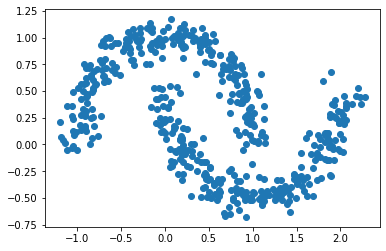

In [157]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_moons(n_samples=500, noise=0.1)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [158]:
X

array([[-3.61876463e-03,  4.39888896e-01],
       [-1.69294538e-01,  9.17285206e-01],
       [-7.14571735e-01,  6.91480559e-01],
       [ 8.50264859e-01, -4.45020996e-01],
       [ 1.93246533e+00,  4.18570888e-01],
       [ 1.27570098e+00, -4.49059919e-01],
       [ 4.17568619e-01,  1.08903770e+00],
       [-3.87080392e-02,  9.69484714e-01],
       [-9.02006439e-01,  3.15386352e-01],
       [ 8.26221974e-01, -4.55243473e-01],
       [ 3.52086500e-01,  6.55907917e-01],
       [-9.58974550e-01,  5.62151124e-01],
       [ 8.54210429e-01, -3.40083260e-01],
       [ 4.38112810e-01,  9.79382494e-01],
       [-1.75986665e-01,  1.06872381e+00],
       [-9.73774757e-01,  1.82800990e-01],
       [-4.81029152e-01,  8.73833747e-01],
       [ 4.07826938e-01, -1.60327849e-01],
       [-2.78870969e-01,  9.68823538e-01],
       [ 2.12186727e-01,  1.02764031e+00],
       [ 1.43811745e+00, -3.97981718e-01],
       [ 1.13383362e+00,  2.34178357e-01],
       [ 7.83213002e-01, -2.86147714e-01],
       [ 1.

Кластеризуйте это с помощью своей версии DBSCAN:

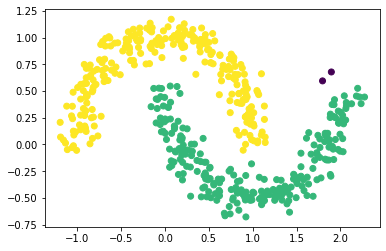

In [159]:
clusters = dbscan(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [160]:
clusters

array([ 1.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  2.,  1.,  1.,  2.,  1.,
        2.,  1.,  2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,
        2.,  1.,  1.,  1.,  1.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,  1.,
        2.,  2.,  1.,  1.,  2., -1.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,
        1.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,
        2.,  1.,  1.,  1.,  2.,  1.,  1.,  2.,  1.,  2.,  2.,  1.,  2.,
        1.,  1.,  2.,  1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  1.,  2.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  1.,  2.,  1.,  2.,  1.,
        1.,  1.,  1.,  2.,  2.,  1.,  1.,  2.,  2.,  2.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  1.,  1.,  2.,
        2.,  1.,  2.,  2.,  2.,  1.,  2.,  2.,  2.,  2.,  1.,  2.,  2.,
        1.,  2.,  2.,  2.,  1.,  2.,  2.,  1.,  1.,  1.,  1.,  2

Референс:

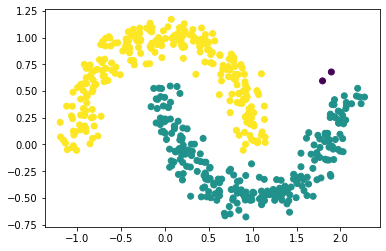

In [161]:
from sklearn.cluster import DBSCAN

clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [73]:
clusters

array([ 1,  0,  1,  0,  1,  1,  0,  1,  0,  0,  0,  1,  0,  0,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  0,  1,  1,  1,  0,  1,  0,  0,  0,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  0,  0,  1,  1,  1,  0,  1,
        1,  0,  1,  1,  0,  1,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0,
        1,  0,  1,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  0,  0,  0,
        1,  0,  1,  0,  1,  1,  1,  0,  1,  1,  0,  1,  0,  1,  1,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,
        0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  1,  0,
        0,  1,  1,  0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,
        0,  1,  0,  1,  1,  0,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,
        0,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  1,  0,  0,  0,  1,  1,
        1,  0,  0,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  1,  0,  0


> Получите 1 балл за ещё один интересный пример кластеризации (в качестве референса используйте предоставленное изображение. Нужно несколько интересных соседствующих форм):



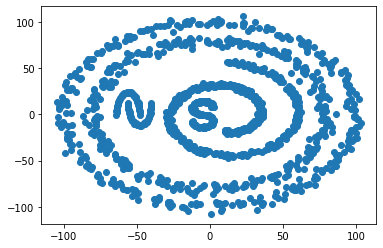

In [ ]:
# your code here

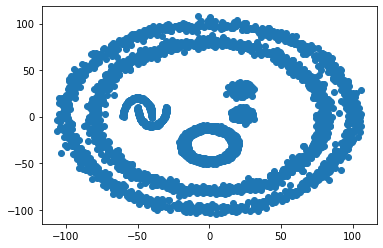

In [85]:
from sklearn.datasets import make_circles, make_moons, make_blobs, make_checkerboard
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_circles(n_samples=2000, noise=0.03)
X *= 100
Y,_ = make_moons(n_samples=500, noise=0.03)
X = np.vstack((X, Y*[10,20] - [50,0]))
Y,_ = make_blobs(n_samples=800, centers = 2, random_state = 8)
X = np.vstack((X, Y*3))
Y, _ = make_circles(n_samples=500, noise=0.03)
X = np.vstack((X, Y*20+[0,-30]))
plt.scatter(X[:,0], X[:,1])
plt.show()

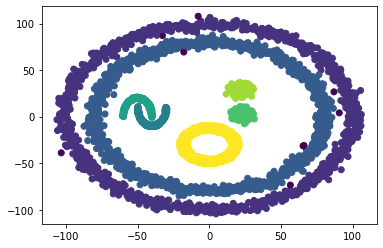

In [86]:
clusters = DBSCAN(eps=5, min_samples=5).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

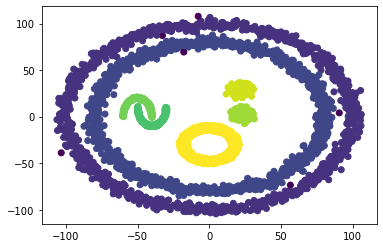

In [87]:
clusters = dbscan(eps=5.5, min_samples=5).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [ ]:
# вроде также хорошо получилось

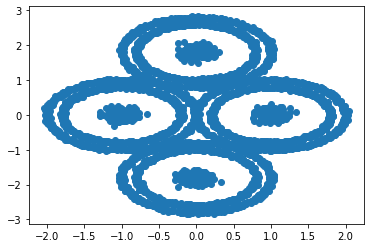

In [163]:
from sklearn.datasets import make_circles, make_moons, make_blobs, make_checkerboard
import matplotlib.pyplot as plt
import pandas as pd

X, _ = make_circles(n_samples=1000, noise=0.02)
X -= [1,0]
Y, _ = make_circles(n_samples=1000, noise=0.02)
X = np.vstack((X, Y + [1,0]))
centers = [[-10, 0], [0, 18], [10, 0], [0,-18]]
Y,_ = make_blobs(n_samples=1000, centers=centers, random_state=40)
X = np.vstack((X, Y/10))
Y,_ = make_circles(n_samples=1000, noise=0.02)
X = np.vstack((X, Y+[0,1.8]))
Y,_ = make_circles(n_samples=1000, noise=0.02)
X = np.vstack((X, Y+[0,-1.8]))
plt.scatter(X[:,0], X[:,1])
plt.show()

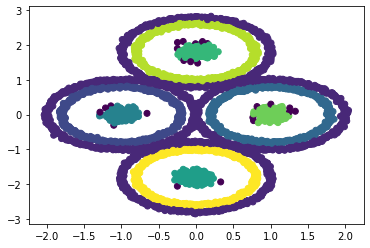

In [152]:
clusters = DBSCAN(eps=0.08, min_samples=7).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [153]:
pd.Series(clusters).value_counts()

 0    2000
 1     500
 2     500
 7     500
 8     500
 4     248
 3     245
 6     243
 5     241
-1      23
dtype: int64

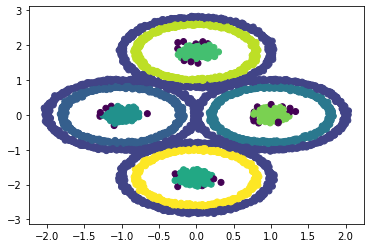

In [168]:
clusters = dbscan(eps=0.08, min_samples=9).fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=clusters)
plt.show()

In [169]:
pd.Series(clusters).value_counts()

 1.0    2000
 2.0     500
 3.0     500
 8.0     500
 9.0     500
 5.0     244
 4.0     243
 6.0     241
 7.0     238
-1.0      34
dtype: int64


> Получите ещё 1 балл, если время работы вашего алгоритма больше референсного не более чем в 100 раз с учётом погрешности 3% от вашего времени:



In [104]:
%%time
%%capture
clusters = DBSCAN(eps=0.2, min_samples=10).fit_predict(X)

Wall time: 6.47 ms


In [108]:
%%time
%%capture
clusters = dbscan(eps=0.15, min_samples=5).fit_predict(X)

Wall time: 1.4 s


In [ ]:
# видно не судьба :(

## Применяем DBSCAN (3 балла)

__[1.5 балла]__ Возьмите колонки `Distance` и `DepTime` (из датасета о задержках самолётов). Запустите на тренировочной выборке на них DBSCAN. Нарисуйте облоко рассеивания с получившимися кластерами. Насколько много их вышло? 

In [183]:
train[['Distance', 'DepTime']]

,Distance,DepTime
0,732,1934
1,834,1548
2,416,1422
3,872,1015
4,423,1828
...,...,...
99995,199,1618
99996,884,804
99997,1076,1901
99998,140,1515


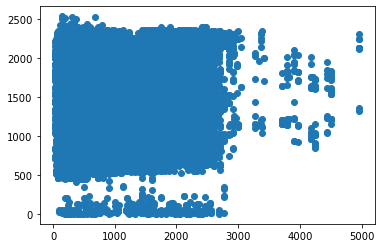

In [180]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_train.csv')
dist = train['Distance']
time = train['DepTime']
plt.scatter(dist, time)
plt.show()

In [181]:
# будем запускать встроенный dbscan, а не наш, чтобы не ждать долго. Все равно наш работает нормально

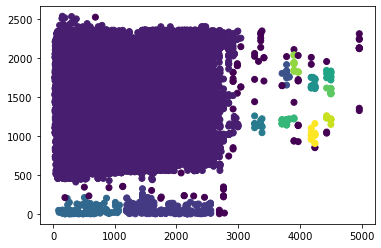

In [188]:
clusters = DBSCAN(eps=100, min_samples=8).fit_predict(train[['Distance', 'DepTime']])

plt.scatter(dist, time, c=clusters)
plt.show()

In [ ]:
# ну есть три больших, ярко выраженных, кластера. При этом справа обраховадись еще 9 штук, совсем небольших 
# (справа вообще распределение выглядит как шум)

Попробуйте перебрать параметры `eps` и `min_samples` по решётке и нарисовать для каждой пары облако рассеивания. При каких параметрах шумовых точек оказывается больше всего? Почему так происходит? 

__Ответ:__ 

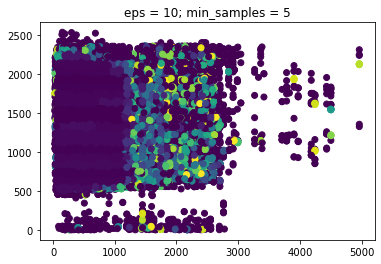

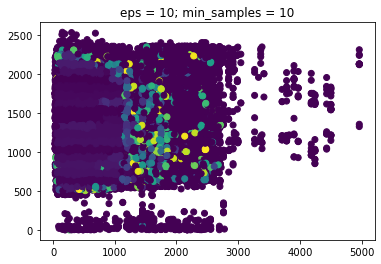

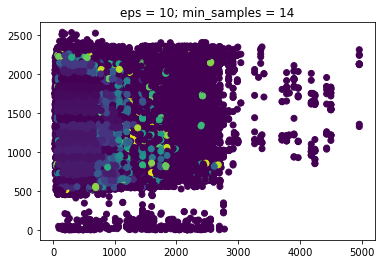

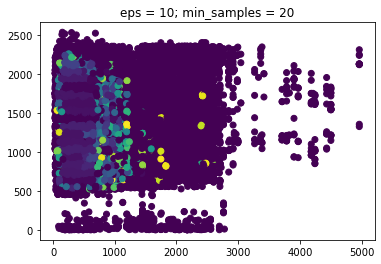

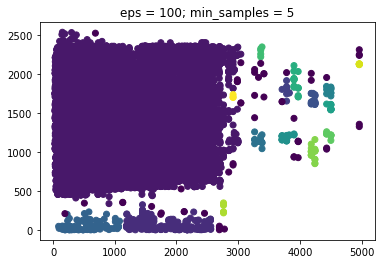

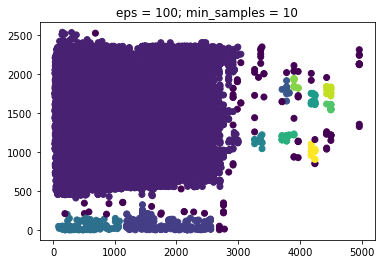

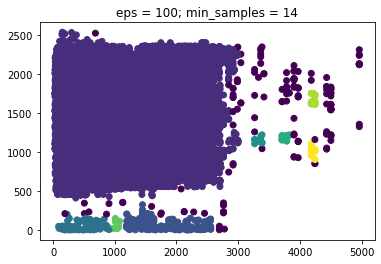

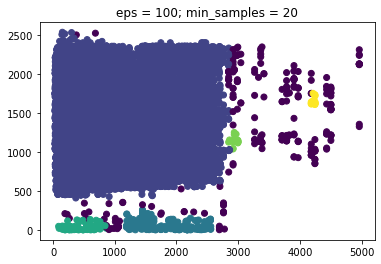

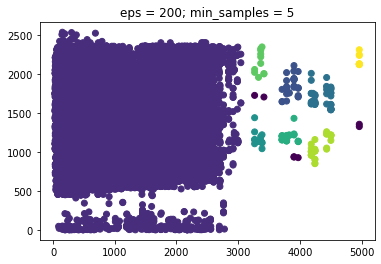

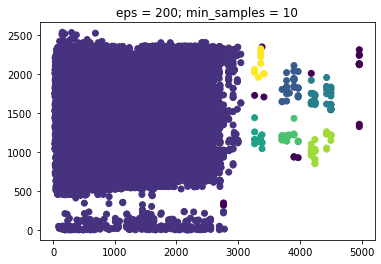

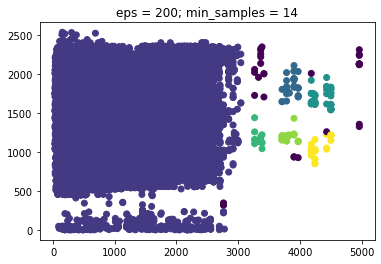

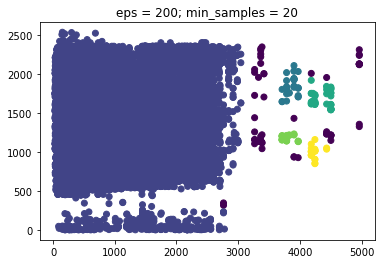

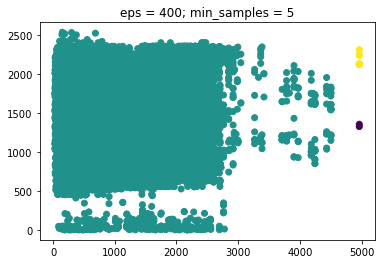

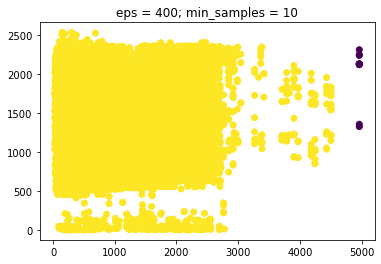

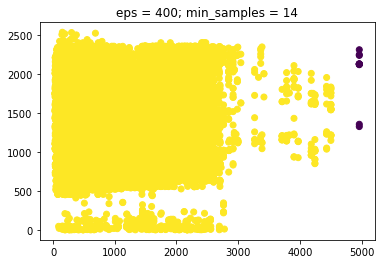

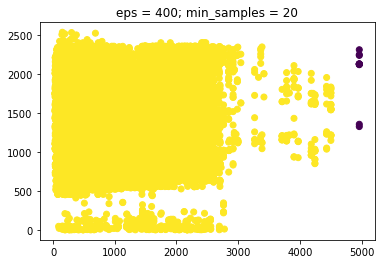

In [192]:
eps = [10, 100, 200, 400]
min_samples = [5, 10, 14, 20]
for ep in eps:
    for samp in min_samples:
        clusters = DBSCAN(eps=ep, min_samples=samp).fit_predict(train[['Distance', 'DepTime']])
        plt.scatter(dist, time, c=clusters)
        plt.title('eps = ' + str(ep) + '; min_samples = ' + str(samp))
        plt.show()

In [ ]:
# Очевидно, что при маленьком eps и большом min_samp шумовых точек больше всего, так как от точки при таких условиях требуется
# больше всего - иметь много соседей на близком расстоянии. Это и видно, когда eps = 10 и min_samp = 20: почти половина точек
# отнеслась к шумовым
# лично мне нравится как правая часть кластеризовалась при eps = 200 и min_samp = 10, но там проблема с левой частью. Она хорошо
# выглядит при eps = 100 и min_samp = 5 или 10

__[1.5 балла]__ Добавьте в датасет новую категориальную переменную: номер кластера из DBSCAN и обучите Catboost со своими лучшими гиперпараметрами. Улучшилось ли качество модели на тестовой выборке? Как думаете, почему? 

In [261]:
train = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw08-boosting-clustering-data/flight_delays_train.csv')

In [262]:
y = train['dep_delayed_15min'].map({'Y': 1, 'N': 0}).values
y = np.array(y)
X = train.drop('dep_delayed_15min', axis = 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in X.columns:
    X[i] = le.fit_transform(X[i])
X

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance
0,10,13,6,1017,0,18,78,577
1,6,12,2,791,18,217,171,651
2,11,11,4,705,20,228,59,306
3,2,17,5,458,15,78,175,683
4,1,28,5,951,19,174,199,313
...,...,...,...,...,...,...,...,...
99995,7,25,2,821,15,246,224,106
99996,0,9,2,327,4,92,72,691
99997,0,16,1,984,13,85,131,828
99998,6,19,3,758,12,79,107,55


In [264]:
clusters = DBSCAN(eps=100, min_samples=8).fit_predict(train[['Distance', 'DepTime']])

In [265]:
X['clust'] = clusters
X

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,clust
0,10,13,6,1017,0,18,78,577,0
1,6,12,2,791,18,217,171,651,0
2,11,11,4,705,20,228,59,306,0
3,2,17,5,458,15,78,175,683,0
4,1,28,5,951,19,174,199,313,0
...,...,...,...,...,...,...,...,...,...
99995,7,25,2,821,15,246,224,106,0
99996,0,9,2,327,4,92,72,691,0
99997,0,16,1,984,13,85,131,828,0
99998,6,19,3,758,12,79,107,55,0


In [266]:
X['clust'].value_counts()

 0     99385
 1       257
 3       140
-1        87
 5        22
 7        19
 4        17
 11       17
 9        14
 8        12
 2        11
 6        10
 10        9
Name: clust, dtype: int64

In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [268]:
X_train

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,clust
76513,9,2,1,284,4,132,77,673,0
60406,8,19,0,471,19,153,211,266,0
27322,9,27,3,742,19,47,211,1150,0
53699,3,26,0,906,13,85,175,474,0
65412,11,4,2,1123,7,217,17,403,0
...,...,...,...,...,...,...,...,...,...
6265,0,23,6,524,12,204,279,359,0
54886,9,20,4,67,6,153,269,1180,1
76820,5,22,4,1099,0,79,202,629,0
860,1,13,4,523,19,251,229,95,0


In [269]:
xgb = XGBClassifier(reg_alpha = 0.01, subsample = 0.7, colsample_bytree = 0.6, gamma = 0.8571428571428571, max_depth = 6,
                   min_child_weight = 3, learning_rate=0.1, n_estimators=250)
xgb.fit(X_train, y_train)
roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

0.7433000721231903

__Ответ:__ Качество почти не улучшилось, так как почти все элементы отнеслись к одному и тому же кластеру

# Небольшие подарочки

**+0.1 балла** за фотографию того, как вы проводите лето на открытом воздухе

https://drive.google.com/file/d/1-NtUmPCOxMXldpOHsK94Pg5HGYeRqKOT/view?usp=sharing 

In [ ]:
# это правда я!

**+0.1 балла** за смешной мем по машинному обучению

https://www.meme-arsenal.com/create/meme/537681

In [ ]:
# P.S. осуждаю тех, кто называет Машинное обучение машинкой

**+0.1 балла** за развернутый отзыв о курсе: ваших впечатлениях, сложностях и радостях, любимых темах и т.д.

Очень классный курс. Супер лектор, который объясняет все четко и понятно, рассказывает анекдоты и просто приятен в общении. Прекрасный семинарист, который объяснял абсолютно все, не жалея своего времени (очень часто заканчивали на час позже, но лично мне так даже больше нравилось). Вообще тема очень интересная, понравилась гораздо больше, чем большинство курсов на матфаке. Самая крутая тема была про логистическую регрессию, оценки вероятностей: очень идейная и красивая :) 